In [30]:
import wave as wave

import pyroomacoustics as pa

import numpy as np

In [6]:
pa.datasets.CMUArcticCorpus(basedir="./CMU_ARCTIC",download=True,speaker=["aew","axb"])

Download http://festvox.org/cmu_arctic/packed/cmu_us_aew_arctic.tar.bz2 into ./CMU_ARCTIC ...
Download http://festvox.org/cmu_arctic/packed/cmu_us_axb_arctic.tar.bz2 into ./CMU_ARCTIC ...


In [31]:
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"
wav = wave.open(sample_wave_file)

In [32]:
print("Sampling Frequency[Hz]: ",wav.getframerate())
print("Sample Size[Byte]: ", wav.getsampwidth())
print("the number of sample: ", wav.getnframes())
print("the number of channel: ", wav.getnchannels())

Sampling Frequency[Hz]:  16000
Sample Size[Byte]:  2
the number of sample:  62081
the number of channel:  1


In [33]:
data = wav.readframes(wav.getnframes())
data = np.frombuffer(data, dtype=np.int16)
wav.close()

In [34]:
import matplotlib.pyplot as plt

In [35]:
#dataの値を2Byteの変数が取り得る値の最大値で正規化
data = data/np.iinfo(np.int16).max

In [36]:
#x軸の値→サンプル数/サンプリング周波数
x = np.array(range(wav.getnframes()))/wav.getframerate()

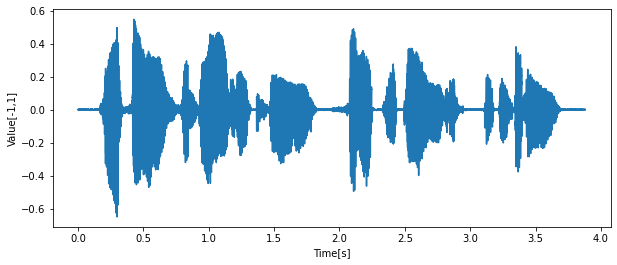

In [37]:
plt.figure(figsize=(10,4))
plt.xlabel("Time[s]")
plt.ylabel("Value[-1,1]")
plt.plot(x,data)
plt.savefig("./wave_form.png")
plt.show()

In [9]:
n_sample = 40000
sample_rate = 16000
np.random.seed(0)
data = np.random.normal(size=n_sample)

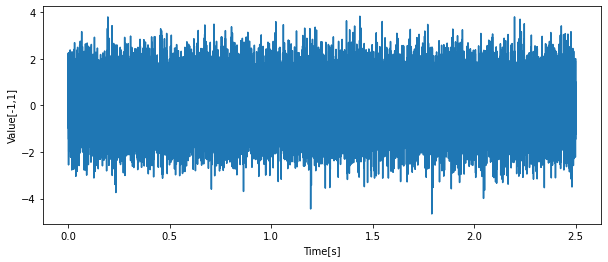

In [10]:
x = np.array(range(n_sample))/sample_rate
plt.figure(figsize=(10,4))
plt.xlabel("Time[s]")
plt.ylabel("Value[-1,1]")
plt.plot(x,data)
plt.show()

In [43]:
np.random.seed(0)
data = np.random.normal(scale=0.1,size=n_sample)
data_scale_adjust = data*np.iinfo(np.int16).max
data_scale_adjust = data_scale_adjust.astype(np.int16)
wave_out = wave.open("./wgn_wave.wav",'w')
wave_out.setnchannels(1)
wave_out.setsampwidth(2)
wave_out.setframerate(sample_rate)
wave_out.writeframes(data_scale_adjust)
wave_out.close()

In [45]:
import sounddevice as sd
sd.play(data, wav.getframerate())
print("再生開始")
status = sd.wait()

再生開始


In [42]:
wave_length = 5
sample_rate = 16000
print("録音開始")
data = sd.rec(int(wave_length*sample_rate), sample_rate, channels=1)
sd.wait()

録音開始


オイラーの公式は以下のように与えられる．
$$
\mathrm{exp}(j\theta) = \mathrm{cos}\theta + j \mathrm{sin}\theta
$$
ここで$j$は虚数単位を示す．
これを用いると複素数$z = x + j y$を別の形式で記述することが可能である．$r = |z|$とすると
$$
z = r \mathrm{exp}(j \theta)
$$
と書くことができ，ここで$x,y$はそれぞれ以下の式で表せられる．
\begin{eqnarray*}
x = r \mathrm{cos}\theta \\
y = r \mathrm{sin}\theta
\end{eqnarray*}
また，オイラーの公式から$\mathrm{exp}(-j\theta) = \mathrm{cos}\theta - j \mathrm{sin}\theta$を用い，連立させることで$\mathrm{cos}\theta, \mathrm{sin}\theta$を求めることができる．
\begin{eqnarray*}
\mathrm{cos}\theta = \frac{\mathrm{exp}(j \theta)+\mathrm{exp}(-j \theta)}{2} \\
\mathrm{sin}\theta = \frac{\mathrm{exp}(j \theta)-\mathrm{exp}(-j \theta)}{2j} \\
\end{eqnarray*}

ここでフレーム$l$における周波数$f$の波形$x'(l,n,f)$は振幅$A_{l,f}$と位相$\theta_{l,f}$を使うと次のように表せる．
$$
x'(l,n,f) = A_{l,f}\mathrm{cos}\left(\frac{2\pi f n}{F_s}+\theta_{l,f}\right)
$$
ここで$F_s$はサンプリング周波数である．すべての周波数の情報を含めようとすると以下の式で表せる．
$$
x'(l,n) = \sum_{f = 0}^{\frac{F_s}{2}}A_{l,f}\mathrm{cos}\left(\frac{2\pi f n}{F_s}+\theta_{l,f}\right)
$$
$F_s/2$はナイキスト周波数であるので上限周波数を示している．
これを$\mathrm{exp}(j\theta)$を用いて表すと以下のようになる．
$$
x'(l,n) = \sum_{f = 0}^{\frac{F_s}{2}} \frac{A_{l,f}\mathrm{exp}\left(j \left(\frac{2\pi f n}{F_s}+\theta_{l,f}\right)\right)+A_{l,f}\mathrm{exp}\left(-j \left(\frac{2\pi f n}{F_s}+\theta_{l,f}\right)\right)}{2} 
$$
次に周波数$f$について0以上の整数$k'$で決まる離散的な変数と考える．
$$
f = \frac{k'F_s}{N}
$$
ここでナイキスト周波数に相当する$k$は$f=\frac{F_s}{2}$となるときなので$k = \frac{N}{2}$である．よって$k'$は0から$\frac{N}{2}$までの整数という事になる．この$k'$を用いると$x'(l,n)$は
$$
x'(l,n) =  \sum_{k' = 0}^{\frac{N}{2}} \frac{A_{l,k'}\mathrm{exp}\left(j \left(\frac{2\pi n k'}{N}+\theta_{l,k'}\right)\right)+A_{l,k'}\mathrm{exp}\left(-j \left(\frac{2\pi n k'}{N}+\theta_{l,k'}\right)\right)}{2} 
$$
と表現できる．

一方で短時間フーリエ変換は以下の式で表すことができる．
$$
y(l,k) = \sum_{n = 0}^{N-1} x'(l, n) \mathrm{exp}\left(-j \frac{2\pi n k}{N}\right)
$$
この$x'(l,n)$を置き換えると以下のように表すことができる
\begin{eqnarray*}
y(l,k) &=& \sum_{n = 0}^{N-1} \sum_{k' = 0}^{\frac{N}{2}} \left\{ \frac{A_{l,k'}}{2} \mathrm{exp}\left(j \left(\frac{2\pi n (k'-k)}{N}+\theta_{l,k'}\right)\right)+\mathrm{exp}\left(-j \left(\frac{2\pi n (k'+k)}{N}+\theta_{l,k'}\right)\right) \right\} \\
&=& \sum_{k' = 0}^{\frac{N}{2}} \frac{A_{l,k'}}{2} \sum_{n = 0}^{N-1} \left\{ \mathrm{exp}\left(j \left(\frac{2\pi n (k'-k)}{N}+\theta_{l,k'}\right)\right)+\mathrm{exp}\left(-j \left(\frac{2\pi n (k'+k)}{N}+\theta_{l,k'}\right)\right) \right\} \\
&&(-\frac{N}{2}-1 \leq k \leq \frac{N}{2})
\end{eqnarray*}
ここで以下の性質を利用する．
$$
\sum_{n = 0}^{N-1}\mathrm{exp}\left(j \left(\frac{2\pi n b}{N}+\theta_{l,k'}\right)\right)　= \begin{cases}
N \mathrm{exp}(j \theta_{l,k'}), & \mathrm{if}  b\in\{0, -N, N\} \\ 
0, & \mathrm{otherwise}
\end{cases}
$$
これはNサンプルで波長1周期の整数倍となっており，$\sum_{n = 0}^{N-1}$を求めることで0になる．
これより4つの場合に分けてこの$y(l，k)$を簡単にしていく．
1. $0 < k < \frac{N}{2}$の場合 \
    $k$は整数なので$1 \leq k \leq \frac{N}{2}-1$と考えることができる．
    このとき，$k'+k$は
    \begin{eqnarray*}
    1 &\leq& k'+k &\leq& \frac{N}{2}+ \frac{N}{2}-1 \\
    1 &\leq& k'+k &\leq& N-1
    \end{eqnarray*}
    となる．また$-\frac{N}{2} + 1 \leq  -k < 0$となる．
    よって$k'-k$は
    \begin{eqnarray*}
    -\frac{N}{2}+1 \leq k' - k \leq \frac{N}{2}
    \end{eqnarray*}
    となる．
    ここで$k'-k$のみに0となる部分が存在する．
    したがって，性質を利用すると
    \begin{eqnarray*}
    y(l,k) &=& \sum_{k' = 0}^{\frac{N}{2}} \frac{A_{l,k'}}{2} \sum_{n = 0}^{N-1} \left\{ \mathrm{exp}\left(j \left(\frac{2\pi n (k'-k)}{N}+\theta_{l,k'}\right)\right)+\underbrace{\mathrm{exp}\left(-j \left(\frac{2\pi n (k'+k)}{N}+\theta_{l,k'}\right)\right)}_{=0} \right\} \\
    &=& \sum_{k' = 0}^{\frac{N}{2}} \frac{A_{l,k'}}{2} N \mathrm{exp}(j \theta_{l,k'}) \\
    &=& \frac{A_{l,k}N}{2} \mathrm{exp}(j \theta_{l,k})
    \end{eqnarray*}
    となる．つまり複素数$y(l,k)$の振幅が$\frac{A_{l,k}N}{2}$に，位相が$\theta_{l,k}$に一致するという関係が得られる．
    つまり，短時間フーリエ変換で求めたy(l,k)を介して$k$番目の周波数の時間ごとの振幅$A_{l,k}$と位相$\theta_{l,k}$を知ることができる．
    
2. $k < 0$の場合　\
    $-\frac{N}{2}+1 \leq k \leq \frac{N}{2}$がより定義域であったことから$-\frac{N}{2}+1 \leq k \leq 0$となる．よって，
    $$
    -\frac{N}{2}+1 \leq k'+k \leq \frac{N}{2}-1(範囲の合計値がNを超えないようにするため，上端で調整している)
    $$
    となり，$0 < -k \leq \frac{N}{2}$より
    \begin{eqnarray*}
    1 &\leq& k' - k &\leq& \frac{N}{2} + \frac{N}{2} -1 \\
    1 &\leq& k' - k &\leq& N -1
    \end{eqnarray*}
    となる．
    ここで$k'+k$のみに0となる部分が存在する．
    したがって，性質を利用すると
    \begin{eqnarray*}
    y(l,k) &=& \sum_{k' = 0}^{\frac{N}{2}} \frac{A_{l,k'}}{2} \sum_{n = 0}^{N-1} \left\{ \underbrace{\mathrm{exp}\left(j \left(\frac{2\pi n (k'-k)}{N}+\theta_{l,k'}\right)\right)}_{=0}+\mathrm{exp}\left(-j \left(\frac{2\pi n (k'+k)}{N}+\theta_{l,k'}\right)\right) \right\} \\
    &=& \sum_{k' = 0}^{\frac{N}{2}} \frac{A_{l,k'}}{2} N \mathrm{exp}(-j \theta_{l,k'}) \\
    &=& \frac{A_{l,k}N}{2} \mathrm{exp}(-j \theta_{l,k})
    \end{eqnarray*}
    となり，ここでも短時間フーリエ変換で求めたy(l,k)を介して$k$番目の周波数の時間ごとの振幅$A_{l,k}$と位相$\theta_{l,k}$を知ることができる．
    
3. $k = 0$のとき
    \begin{eqnarray*}
    y(l,k) &=& \sum_{k' = 0}^{\frac{N}{2}} \sum_{n = 0}^{N-1}  \frac{A_{l,k'}}{2}\left\{ \underbrace{\mathrm{exp}\left(j \left(\frac{2\pi n k'}{N}+\theta_{l,k'}\right)\right)}_{k'=0\Leftrightarrow =N\mathrm{exp}(j\theta_{l,k}), k'\neq 0\Leftrightarrow=0}+\underbrace{\mathrm{exp}\left(-j \left(\frac{2\pi n k'}{N}+\theta_{l,k'}\right)\right)}_{k'=0\Leftrightarrow =N\mathrm{exp}(-j\theta_{l,k}), k'\neq 0 \Leftrightarrow=0} \right\} \\
    &=& \frac{A_{l,k}}{2} \left\{ N\mathrm{exp}(j\theta_{l,k}) + N\mathrm{exp}(j\theta_{l,k}) \right\} \\
    &=& \frac{A_{l,k}N}{2} \left\{ \mathrm{exp}(j\theta_{l,k}) + \mathrm{exp}(j\theta_{l,k}) \right\} \\
    &=& \frac{A_{l,k}N}{2} \left\{ \mathrm{cos}(\theta_{l,k}) + j\mathrm{sin}(\theta_{l,k}) + \mathrm{cos}(\theta_{l,k}) - j\mathrm{sin}(\theta_{l,k}) \right\} \\
    &=& A_{l,k}N \mathrm{cos}(\theta_{l,k})
    \end{eqnarray*}
    となり，$y(l,k)$は複素数でなく，実数を取る．この部分のデータを***オフセット成分***と呼ぶ．これは処理の過程で0としてしまっても問題は発生しない．
    
4.  $k = \frac{N}{2}$のとき
    \begin{eqnarray*}
    \frac{N}{2} &\leq& k'+k &\leq& N \\
    -\frac{N}{2} &\leq& k'-k &\leq& 0
    \end{eqnarray*}
    このようになるので$k'+k=0$の場合と$k'-k=N$の場合に注意すると，
    $$
    y(l,k)=A_{l,k}N \mathrm{cos}(\theta_{l,k})
    $$
    となる．これは$k = 0$のときと同様となる．
    
 以上より，いずれのケースにおいても短時間フーリエ変換を行うことで複素数$y(l,k)$から＄k＄に相当する周波数の振幅$A_{l,k}$と位相$\theta_{l,k}$を容易に知ることができる．また，負の周波数の成分は複素共役であることがわかる．したがって，一般的に$k$が$0$から$\frac{N}{2}$までの結果で十分である．

In [38]:
import scipy.signal as sp

f,t,stft_data = sp.stft(data, fs = wav.getframerate(),window="hann", nperseg=512, noverlap=256)

print("短時間フーリエ変換後のshape : ",np.shape(stft_data))
print("周波数軸 [Hz] : ",f)
print("時間軸[s] : ",t)

短時間フーリエ変換後のshape :  (257, 244)
周波数軸 [Hz] :  [   0.     31.25   62.5    93.75  125.    156.25  187.5   218.75  250.
  281.25  312.5   343.75  375.    406.25  437.5   468.75  500.    531.25
  562.5   593.75  625.    656.25  687.5   718.75  750.    781.25  812.5
  843.75  875.    906.25  937.5   968.75 1000.   1031.25 1062.5  1093.75
 1125.   1156.25 1187.5  1218.75 1250.   1281.25 1312.5  1343.75 1375.
 1406.25 1437.5  1468.75 1500.   1531.25 1562.5  1593.75 1625.   1656.25
 1687.5  1718.75 1750.   1781.25 1812.5  1843.75 1875.   1906.25 1937.5
 1968.75 2000.   2031.25 2062.5  2093.75 2125.   2156.25 2187.5  2218.75
 2250.   2281.25 2312.5  2343.75 2375.   2406.25 2437.5  2468.75 2500.
 2531.25 2562.5  2593.75 2625.   2656.25 2687.5  2718.75 2750.   2781.25
 2812.5  2843.75 2875.   2906.25 2937.5  2968.75 3000.   3031.25 3062.5
 3093.75 3125.   3156.25 3187.5  3218.75 3250.   3281.25 3312.5  3343.75
 3375.   3406.25 3437.5  3468.75 3500.   3531.25 3562.5  3593.75 3625.
 3656.25 3687.5  3

ここで第一成分が周波数，第二成分が時間軸を表している．\\
角時間周波数の音声を$x_{lk}$とする．そして振幅と位相を用いて，複素数$x_{lk}$を
$$
x_{lk} = |x_{lk}| \mathrm{exp}(j\phi(x_{lk}))
$$
と表す．ここで$|x_{lk}|$は振幅であり，$\phi(x_{lk})$を位相とする．

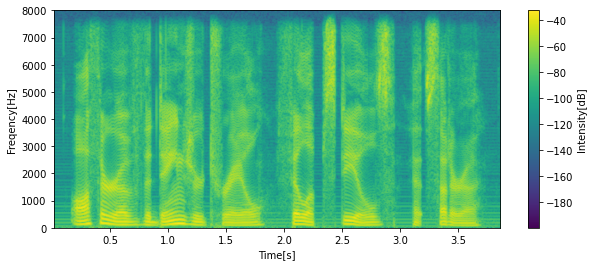

In [42]:
fig = plt.figure(figsize=(10,4))

#specgram内でSTFTはやってくれる
spectrum, freqs, t, im = plt.specgram(data, NFFT=512, noverlap=512/16*15, Fs=wav.getframerate())

fig.colorbar(im).set_label('Intensity[dB]')

plt.xlabel("Time[s]")

plt.ylabel("Freqency[Hz]")

plt.savefig("./spectrogram.png")

plt.show()

次に短時間逆フーリエ変換を施して音声波形に戻す．

短時間逆フーリエ変換は以下の式で与えられる．
$$
y'(l,n) = \frac{1}{N} \sum_{k = 0}^{N-1} y(l,k)\exp\left(j\frac{2\pi n k}{N}\right)
$$

In [43]:
t, data_post=sp.istft(stft_data, fs=wav.getframerate(), window="hann", nperseg=512, noverlap=256)
data_post=data_post.astype(np.int16)
wave_out = wave.open("./istft_post_wave.wav",'w')
wave_out.setnchannels(1)
wave_out.setsampwidth(2)
wave_out.setframerate(wav.getframerate())
wave_out.writeframes(data_post)
wave_out.close()
wav.close()

In [49]:
stft_data[100:, :] = 0

t,data_post = sp.istft(stft_data,fs=wav.getframerate(), window="hann", nperseg=512, noverlap=256)

data_post = data_post.astype(np.int16)

sd.play(data_post, wav.getframerate())

print("再生開始")

status = sd.wait()

wav.close()

再生開始


背景の雑音の除去を試みる．ここでは2つの手法を用いる．

はじめにスペクトルサブトラクションでやってみる．入力信号の振幅成分から雑音成分を引き算することで雑音成分を抑圧する．式は次のように与えられる．
$$
|s_{lk}| \approx \sqrt[p]{max(|x_{lk}|^p-\alpha |n_{lk}|^p, \in)}
$$
ここで$p$は$1 or 2$に設定することが一般的である．　また，$\alpha$はスペクトルサブトラクションと呼び，どのくらい雑音を抑圧するかを制御するパラメータである．$n_{lk}$は雑音の振幅で別途推定する必要がある． \\
例えば雑音だけが存在する時間帯があれば，その時間のマイクロホン入力信号の情報から雑音の振幅を次のように推定できる．
$$
|n_{lk}| = \sqrt{\frac{1}{\Omega_n}\sum_{l\in \Omega_n} |x_{lk}|^2}
$$
一方で位相は次のように求められる．
$$
\mathrm{exp}(j\phi(x_{lk})) = \frac{x_{lk}}{|x_{lk}|}
$$
これを利用して
$$
\hat{s}_{lk} = |s_{lk}| \frac{x_{lk}}{|x_{lk}|}
$$
で推定する．

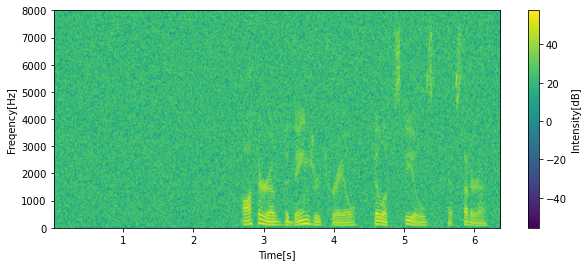

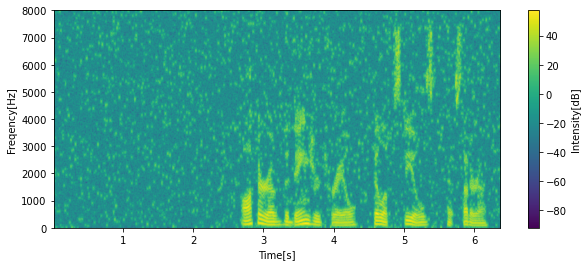

In [72]:
#読み込むサンプルファイル
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

#ファイルを読み込む
wav=wave.open(sample_wave_file)

#音声区間の長さを取る
n_speech=wav.getnframes()

#サンプリングレートを取る
sampling_rate=wav.getframerate()

#PCM形式の波形データを読み込み
speech_signal=wav.readframes(wav.getnframes())

#speech_signalを2バイトの数値列に変換
speech_signal=np.frombuffer(speech_signal, dtype=np.int16)

n_speech = wav.getnframes()

n_noise_only = 40000

n_sample = n_noise_only + n_speech

wgn_signal = np.random.normal(scale=0.04, size=n_sample)

wgn_signal = wgn_signal*np.iinfo(np.int16).max

wgn_signal = wgn_signal.astype(np.int16)

mix_signal = wgn_signal
mix_signal[n_noise_only :]+= speech_signal

fig = plt.figure(figsize=(10,4))
#specgram内でSTFTはやってくれる
spectrum, freqs, t, im = plt.specgram(mix_signal, NFFT=512, noverlap=512/16*15, Fs=wav.getframerate())
fig.colorbar(im).set_label('Intensity[dB]')
plt.xlabel("Time[s]")
plt.ylabel("Freqency[Hz]")
plt.show()

f,t,stft_data=sp.stft(mix_signal, fs=wav.getframerate(), window="hann", nperseg=512, noverlap=256)

amp = np.abs(stft_data)

phase  = stft_data/np.maximum(amp, 1.e-20)

n_noise_only_frame = np.sum(t<(n_noise_only/sampling_rate))

p = 1.0
alpha = 2.0

noise_amp = np.power(np.mean(np.power(amp,p)[:, :n_noise_only_frame],axis=1, keepdims = True), 1./p)

eps = 0.01*np.power(amp,p)

processed_amp = np.power(np.maximum(np.power(amp,p)-alpha*np.power(noise_amp,p),eps), 1./p)

processed_stft_data = processed_amp*phase

t, processed_data_post = sp.istft(processed_stft_data, fs=wav.getframerate(), window="hann", nperseg=512, noverlap=256)

#processed_data_post = processed_data_post*np.iinfo(np.int16).max
processed_data_post = processed_data_post.astype(np.int16)

fig = plt.figure(figsize=(10,4))
#specgram内でSTFTはやってくれる
spectrum, freqs, t, im = plt.specgram(processed_data_post, NFFT=512, noverlap=512/16*15, Fs=wav.getframerate())
fig.colorbar(im).set_label('Intensity[dB]')
plt.xlabel("Time[s]")
plt.ylabel("Freqency[Hz]")
plt.show()

In [74]:
sd.play(processed_data_post, wav.getframerate())

print("再生開始")

status = sd.wait()

wav.close()

再生開始
